In [1]:
from qutip import *
from numpy import *
from scipy import constants
import matplotlib.pyplot as plt

In [ ]:
sx, sy, sz = sigmax(), sigmay(), sigmaz()
sm, sp = destroy(2), create(2)
I = qeye(2)
kB = constants.k
h_bar = constants.hbar
smA = tensor(sm, I)
smB = tensor(I, sm)
spA = smA.dag()
spB = smB.dag()
szA = tensor(sz, I)
szB = tensor(I, sz)
sxA = tensor(sx, I)
sxB = tensor(I, sx)
syA = tensor(sy, I)
syB = tensor(I, sx)

omega_A, omega_B = 1.0, 1.0
J = 0.7

H = 0.5 * omega_A * szA + 0.5 * omega_B * szB + J * (sxA * sxB + syA * syB)

rA, phiA, T_A, gammaA = 0.5, 0.5, 1 / 0.95, 0.1
rB, phiB, T_B, gammaB = 0.5, 0.5, 1 / 0.72, 0.1

# NthA = 1 / (exp(omega_A/T_A) - 1)
# NthB = 1 / (exp(omega_B/T_B) - 1)

NthA, NthB = 0.1, 0.1

R_A = smA * cosh(rA) + spA * exp(1j * phiA) * sinh(rA)
R_B = smB * cosh(rB) + spB * exp(1j * phiB) * sinh(rB)

R1_A = sqrt(gammaA * (NthA + 1)) * R_A
R2_A = sqrt(gammaA * NthA) * R_A.dag()
R1_B = sqrt(gammaB * (NthB + 1)) * R_B
R2_B = sqrt(gammaB * NthB) * R_B.dag()

c_ops = [R1_A, R2_A, R1_B, R2_B]

psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = ket2dm(psi0)

tlist = linspace(0, 100, 200)
result = mesolve(H, rho0, tlist, c_ops, e_ops=[szA, szB])

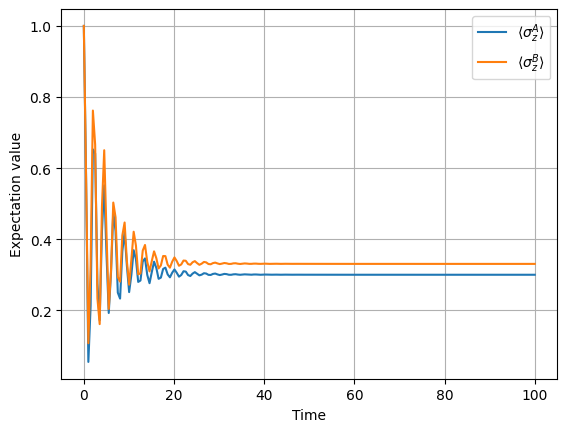

In [ ]:
plt.plot(tlist, result.expect[0], label=r'$\langle \sigma_z^A \rangle$')
plt.plot(tlist, result.expect[1], label=r'$\langle \sigma_z^B \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.grid()
plt.legend()
plt.show()

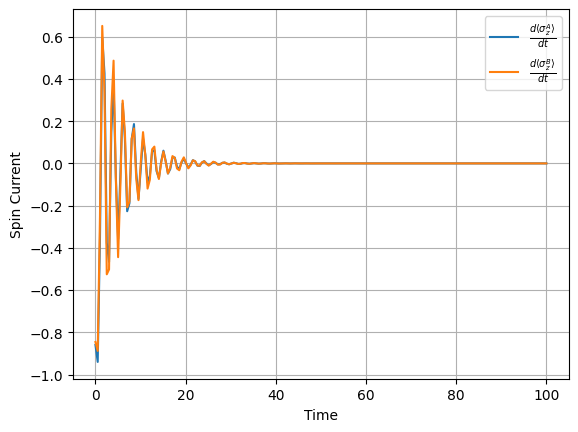

In [ ]:
# Spin Current
Spin_Current_A = gradient(result.expect[0], tlist)
Spin_Current_B = gradient(result.expect[1], tlist)

plt.plot(tlist, Spin_Current_A, label=r'$\frac{d \langle \sigma_z^A \rangle}{dt}$')
plt.plot(tlist, Spin_Current_B, label=r'$\frac{d \langle \sigma_z^B \rangle}{dt}$')
plt.xlabel('Time')
plt.ylabel('Spin Current')
plt.grid()
plt.legend()
plt.show()

In [ ]:
NthA

0.1

In [ ]:
NthB

0.8

In [ ]:
Spin_Current_A[-1]

np.float64(-2.142237586538731e-07)

In [ ]:
Spin_Current_B[-1]

np.float64(-3.7755600235167157e-07)

In [ ]:
Spin_Current_A[-1]

np.float64(5.484628019342072e-07)

In [ ]:
dN = linspace(0, 100, 100)
A, B = [], []
for i in dN:
  NthA = 0.1
  NthB = NthA + i
  R_A = smA * cosh(rA) + spA * exp(1j * phiA) * sinh(rA)
  R_B = smB * cosh(rB) + spB * exp(1j * phiB) * sinh(rB)

  R1_A = sqrt(gammaA * (NthA + 1)) * R_A
  R2_A = sqrt(gammaA * NthA) * R_A.dag()
  R1_B = sqrt(gammaB * (NthB + 1)) * R_B
  R2_B = sqrt(gammaB * NthB) * R_B.dag()

  c_ops = [R1_A, R2_A, R1_B, R2_B]

  psi0 = tensor(basis(2, 0), basis(2, 0))
  rho0 = ket2dm(psi0)

  tlist = linspace(0, 500, 1000)
  result = mesolve(H, rho0, tlist, c_ops, e_ops=[szA, szB])

  # Spin Current
  Spin_Current_A = gradient(result.expect[0], tlist)
  Spin_Current_B = gradient(result.expect[1], tlist)

  A.append(Spin_Current_A[-1])
  B.append(Spin_Current_B[-1])

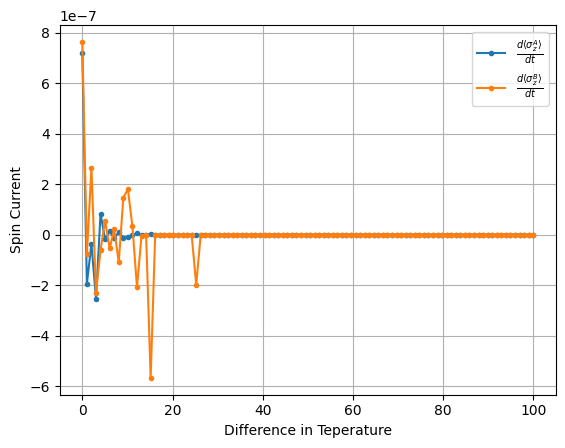

In [ ]:
plt.plot(dN, A, '.-', label=r'$\frac{d \langle \sigma_z^A \rangle}{dt}$')
plt.plot(dN, B, '.-', label=r'$\frac{d \langle \sigma_z^B \rangle}{dt}$')
plt.xlabel('Difference in Teperature')
plt.ylabel('Spin Current')
plt.grid()
plt.legend()
plt.show()

We start with the time derivative of the expectation value:

$$
\frac{d}{dt} \langle \sigma_z \rangle = \frac{d}{dt} \mathrm{Tr}(\sigma_z \rho)
= \mathrm{Tr} \left( \sigma_z \frac{d\rho}{dt} \right)
$$

Using the Lindblad master equation:

$$
\frac{\partial \rho}{\partial t} = -i[H, \rho] + \sum_{i=1}^2 \mathcal{D}^{(i)}(\rho)
$$

we obtain:

$$
\frac{d}{dt} \langle \sigma_z \rangle = -i \, \mathrm{Tr}(\sigma_z [H, \rho]) + \sum_i \mathrm{Tr} \left( \sigma_z \mathcal{D}^{(i)}(\rho) \right)
$$

---

### Hamiltonian Part

Using cyclicity of the trace:

$$
-i \, \mathrm{Tr}(\sigma_z [H, \rho]) = -i \, \mathrm{Tr}(\rho [\sigma_z, H]) = \langle [\sigma_z, H] \rangle
$$

---

### Dissipative Part

From the Lindblad dissipator for bath $ i $:

$$
\mathcal{D}^{(i)}(\rho) = \sum_j \left( R_j^{(i)} \rho R_j^{(i)\dagger} - \frac{1}{2} \left\{ R_j^{(i)\dagger} R_j^{(i)}, \rho \right\} \right)
$$

Then:

$$
\mathrm{Tr} \left( \sigma_z \mathcal{D}^{(i)}(\rho) \right) 
= \sum_j \mathrm{Tr} \left( \sigma_z R_j^{(i)} \rho R_j^{(i)\dagger} \right)
- \frac{1}{2} \mathrm{Tr} \left( \sigma_z R_j^{(i)\dagger} R_j^{(i)} \rho + \sigma_z \rho R_j^{(i)\dagger} R_j^{(i)} \right)
$$

$$
= \sum_j \left( \langle R_j^{(i)\dagger} \sigma_z R_j^{(i)} \rangle 
- \frac{1}{2} \langle \{ R_j^{(i)\dagger} R_j^{(i)}, \sigma_z \} \rangle \right)
$$

---

### Final Result

Combining both contributions:

$$
\frac{d}{dt} \langle \sigma_z \rangle 
= i \langle [H, \sigma_z] \rangle 
+ \sum_{i,j=1}^2 \left( \langle R_j^{(i)\dagger} \sigma_z R_j^{(i)} \rangle 
- \frac{1}{2} \langle \{ R_j^{(i)\dagger} R_j^{(i)}, \sigma_z \} \rangle \right)
$$

Here,
$$
H = H^A + H^B + H_{int}
$$

Thus for spin current for system A,
$$
J_s^A = i \langle [H, \sigma_z^A] \rangle
$$
$$
= i \langle [H_{int}, \sigma_z^A] \rangle
$$

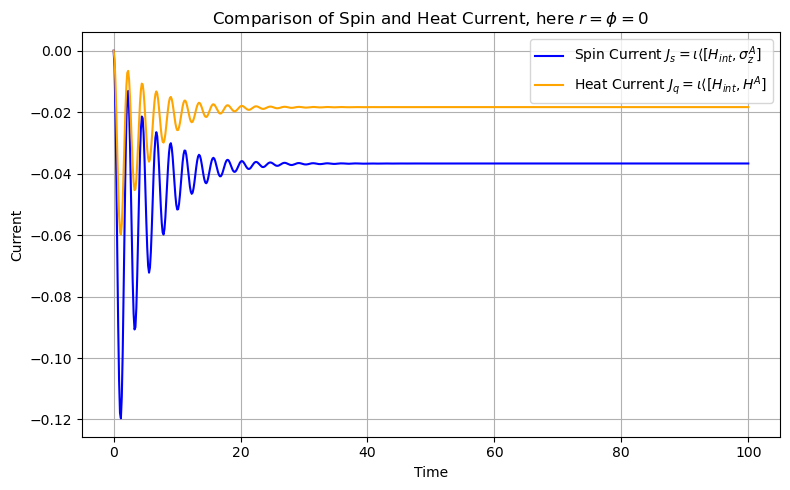

In [26]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

sx, sy, sz = sigmax(), sigmay(), sigmaz()
sm, sp = destroy(2), create(2)
I = qeye(2)

smA = tensor(sm, I)
smB = tensor(I, sm)
spA = smA.dag()
spB = smB.dag()

szA = tensor(sz, I)
szB = tensor(I, sz)
sxA = tensor(sx, I)
sxB = tensor(I, sx)
syA = tensor(sy, I)
syB = tensor(I, sy)

omega_A, omega_B = 1.0, 1.0
J = 0.7

H_A = 0.5 * omega_A * szA
H_B = 0.5 * omega_B * szB
H_int = J * (sxA * sxB + syA * syB)
H = H_A + H_B + H_int

rA, phiA, T_A, gammaA = 0.0, 0.0, 1 / 0.95, 0.1
rB, phiB, T_B, gammaB = 0.0, 0.0, 1 / 0.72, 0.1
NthA, NthB = 0.1, 0.8

R_A = smA * np.cosh(rA) + spA * np.exp(1j * phiA) * np.sinh(rA)
R_B = smB * np.cosh(rB) + spB * np.exp(1j * phiB) * np.sinh(rB)
R1_A = np.sqrt(gammaA * (NthA + 1)) * R_A
R2_A = np.sqrt(gammaA * NthA) * R_A.dag()
R1_B = np.sqrt(gammaB * (NthB + 1)) * R_B
R2_B = np.sqrt(gammaB * NthB) * R_B.dag()
c_ops = [R1_A, R2_A, R1_B, R2_B]


psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = ket2dm(psi0)


Js_op = 1j * (H_int * szA - szA * H_int)
Jq_op = 1j * (H_int * H_A - H_A * H_int)


tlist = np.linspace(0, 100, 700)
result = mesolve(H, rho0, tlist, c_ops, e_ops=[Js_op, Jq_op])

Js_vals = np.real(result.expect[0])
Jq_vals = np.real(result.expect[1])

plt.figure(figsize=(8, 5))
plt.plot(tlist, Js_vals, label='Spin Current $J_s=\iota \langle [H_{int}, \sigma_z^A]$', color='blue')
plt.plot(tlist, Jq_vals, label='Heat Current $J_q=\iota \langle [H_{int}, H^A]$', color='orange')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title(r'Comparison of Spin and Heat Current, here $r=\phi=0$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

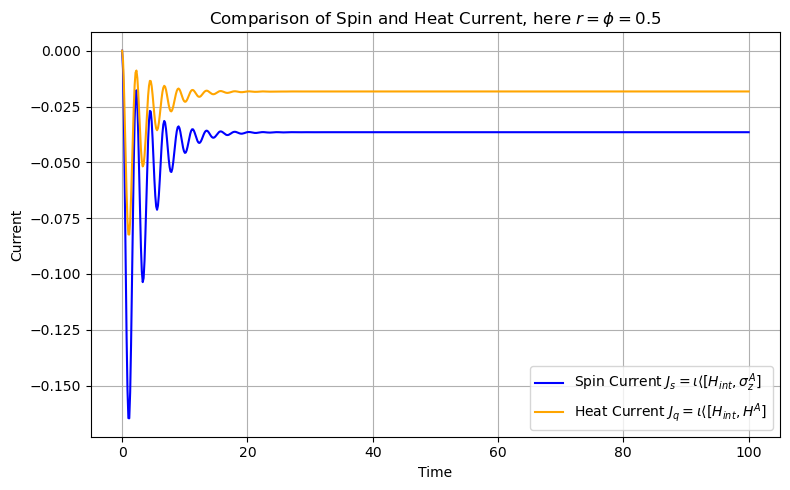

In [27]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

sx, sy, sz = sigmax(), sigmay(), sigmaz()
sm, sp = destroy(2), create(2)
I = qeye(2)

smA = tensor(sm, I)
smB = tensor(I, sm)
spA = smA.dag()
spB = smB.dag()

szA = tensor(sz, I)
szB = tensor(I, sz)
sxA = tensor(sx, I)
sxB = tensor(I, sx)
syA = tensor(sy, I)
syB = tensor(I, sy)

omega_A, omega_B = 1.0, 1.0
J = 0.7

H_A = 0.5 * omega_A * szA
H_B = 0.5 * omega_B * szB
H_int = J * (sxA * sxB + syA * syB)
H = H_A + H_B + H_int

rA, phiA, T_A, gammaA = 0.5, 0.5, 1 / 0.95, 0.1
rB, phiB, T_B, gammaB = 0.5, 0.5, 1 / 0.72, 0.1
NthA, NthB = 0.1, 0.8

R_A = smA * np.cosh(rA) + spA * np.exp(1j * phiA) * np.sinh(rA)
R_B = smB * np.cosh(rB) + spB * np.exp(1j * phiB) * np.sinh(rB)
R1_A = np.sqrt(gammaA * (NthA + 1)) * R_A
R2_A = np.sqrt(gammaA * NthA) * R_A.dag()
R1_B = np.sqrt(gammaB * (NthB + 1)) * R_B
R2_B = np.sqrt(gammaB * NthB) * R_B.dag()
c_ops = [R1_A, R2_A, R1_B, R2_B]


psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = ket2dm(psi0)


Js_op = 1j * (H_int * szA - szA * H_int)
Jq_op = 1j * (H_int * H_A - H_A * H_int)


tlist = np.linspace(0, 100, 700)
result = mesolve(H, rho0, tlist, c_ops, e_ops=[Js_op, Jq_op])

Js_vals = np.real(result.expect[0])
Jq_vals = np.real(result.expect[1])

plt.figure(figsize=(8, 5))
plt.plot(tlist, Js_vals, label='Spin Current $J_s=\iota \langle [H_{int}, \sigma_z^A]$', color='blue')
plt.plot(tlist, Jq_vals, label='Heat Current $J_q=\iota \langle [H_{int}, H^A]$', color='orange')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title(r'Comparison of Spin and Heat Current, here $r=\phi=0.5$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()